### Problem Statment 

This ML Model will predict whether income of an individual exceeds $50K/per year based on census data given. 

Further more Model will also evalauet it's results on unseen data and check if model has learned noisy information as well. This model will look into ways to handle imbalance of class data as well but not compromise with model robustness

Few highlights of Model and challanges we will try to solve: 

*   Binary Classfication for salaries
*   Low Training Model Error and Test Error
*   Class Imbalance 
*   Which model is giving us the best results? 





### Settings

In [ ]:
#import compromise required for ML Processing 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read Train and Test Data from url

In [ ]:
#downloading train and test files using webpage given

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/'
ext = ''

def listFD(url, ext=''):
    page = requests.get(url).text
    #print(page)
    soup = BeautifulSoup(page, 'html.parser')
    return [url + '/' + node.get('href') for node in soup.find_all('a') if node.get('href').endswith(ext)]

for file in listFD(url, ext):
    if file.count('adult.data')>=1:
        train = pd.read_csv(file,
                 sep=',', names=range(0,15)
                 )
        
    elif file.count('adult.test')>=1:
        test = pd.read_csv(file,
                 sep=',', names=range(0,15)
                 )
    else:
        print('download not required')

download not required
download not required
download not required
download not required


### Observe Data 

In [ ]:
#checking size of the data given
train.shape, test.shape

((32561, 15), (16282, 15))

In [ ]:
#Observing last few rows data
train.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
#Observing first few rows of data
train.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


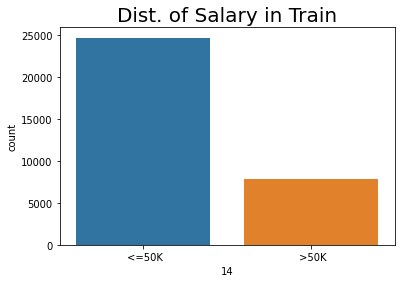

In [ ]:
#checking the salaries distribution and class imbalance 
sns.countplot(train[14])
plt.title('Dist. of Salary in Train', fontsize='20')
plt.show()

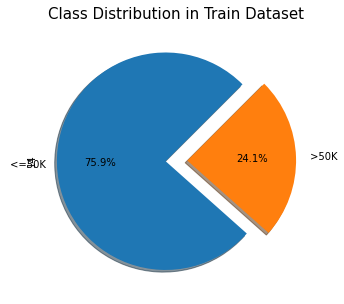

Number of class in train dataset: 2


In [ ]:
plt.figure(figsize=(10, 5))
train[14].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.1,0.1],startangle=45)
                                                                                      
plt.title('Class Distribution in Train Dataset', fontsize=15)
plt.show()
print("Number of class in train dataset:",len(train[14].unique()) ) 

data is highly imbalance, so will look into techniques which can give us better accuracy with this data

In [ ]:
test.tail() #observing the test data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


In [ ]:
test.head() #observing test data again

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


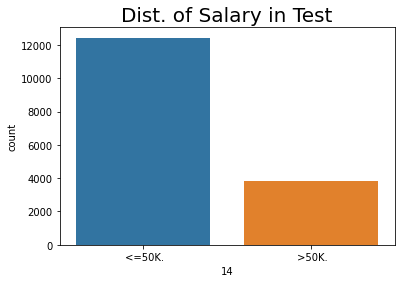

In [ ]:
sns.countplot(test[14])
plt.title('Dist. of Salary in Test', fontsize='20')
plt.show()

In test also class imblance, though it does not matter, model will predict same in case case. 

In [ ]:
# Define features & target like what are cont. and what are catg. 
num_feats = train.drop(columns=[0,14]).select_dtypes(include='number').columns.tolist()
cat_feats = train.drop(columns=[0,14]).select_dtypes(include='object').columns.tolist()
feats = num_feats+cat_feats
target = 14
print(num_feats)
print(cat_feats)

[2, 4, 10, 11, 12]
[1, 3, 5, 6, 7, 8, 9, 13]


In [ ]:
train[num_feats].describe().transpose() #observing cont. features

,count,mean,std,min,25%,50%,75%,max
2,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
4,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
10,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
11,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
12,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
train[cat_feats].describe() #observing catg. features

,1,3,5,6,7,8,9,13
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


In [ ]:
train.isnull().sum()  #checking for null values if any

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [ ]:
test.isnull().sum()  #test has some missing values 

0     0
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
dtype: int64

### Data Cleaning

In [ ]:
train[train.duplicated()] #checking for duplicated values in dataset 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [ ]:
train[train.duplicated()].shape #only need to drop duplicate values in train, test duplication can happen in real time as well. 

(24, 15)

In [ ]:
train=train[~train.duplicated()]
train.shape

(32537, 15)

In [ ]:
test = test.dropna()  #removing null values from test as it's very low
test.shape

(16281, 15)

In [ ]:
#checking if the catgories are matching for train and test, else will have to adjust that
for each in train[cat_feats].columns:
   print('train column', each, 'values',len(train[each].unique()))
   print('test column', each, 'values', len(test[each].unique()))
   print('train and test catg matches', len(train[~train[each].isin(test[each].unique())][each])) # zero means all catg are present in train which are in test
   print('test and train catg matches', len(test[~test[each].isin(train[each].unique())][each]))  # zero means all catg are present in train which are in test
   print('---------------------------------------------------')

train column 1 values 9
test column 1 values 9
train and test catg matches 0
test and train catg matches 0
---------------------------------------------------
train column 3 values 16
test column 3 values 16
train and test catg matches 0
test and train catg matches 0
---------------------------------------------------
train column 5 values 7
test column 5 values 7
train and test catg matches 0
test and train catg matches 0
---------------------------------------------------
train column 6 values 15
test column 6 values 15
train and test catg matches 0
test and train catg matches 0
---------------------------------------------------
train column 7 values 6
test column 7 values 6
train and test catg matches 0
test and train catg matches 0
---------------------------------------------------
train column 8 values 5
test column 8 values 5
train and test catg matches 0
test and train catg matches 0
---------------------------------------------------
train column 9 values 2
test column 9 valu

In [ ]:
#On class mismtach only, hence removing it and assuming in future data also this will not appear
train[~train[13].isin(test[13].unique())][13].value_counts() 

 Holand-Netherlands    1
Name: 13, dtype: int64

In [ ]:
test[~test[13].isin(train[13].unique())][13].unique()

array([], dtype=object)

In [ ]:
train= train[train[13].isin(test[13].unique())]  #removing single row, it won't affect our analysis much 
train.shape

(32536, 15)

In [ ]:
train[6].unique() #just checking if '?' is also a catg present in train and test, it's so not removing it as well

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
test[6].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv', ' ?',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [ ]:
train[14].unique(),test[14].unique() #both the classes are not in same format for test and train

(array([' <=50K', ' >50K'], dtype=object),
 array([' <=50K.', ' >50K.'], dtype=object))

In [ ]:
#Standarized the class type in train and test dataset

train[14] = train[14].apply(lambda x:x.strip(' ')) 
test[14] = test[14].apply(lambda x:x.strip(' '))
test[14] = test[14].apply(lambda x:x.strip('.'))

In [ ]:
train[14].unique(),test[14].unique()

(array(['<=50K', '>50K'], dtype=object),
 array(['<=50K', '>50K'], dtype=object))

In [ ]:
train[14] = train[14].map({'<=50K': 0, '>50K': 1})
test[14] = test[14].map({'<=50K': 0, '>50K': 1})

In [ ]:
train[14].unique(), test[14].unique()  #finally, we have our binary classes here as 0 and 1

(array([0, 1]), array([0, 1]))

### Univariate Analysis

 observing our single features here

In [ ]:
cat_feats

[1, 3, 5, 6, 7, 8, 9, 13]

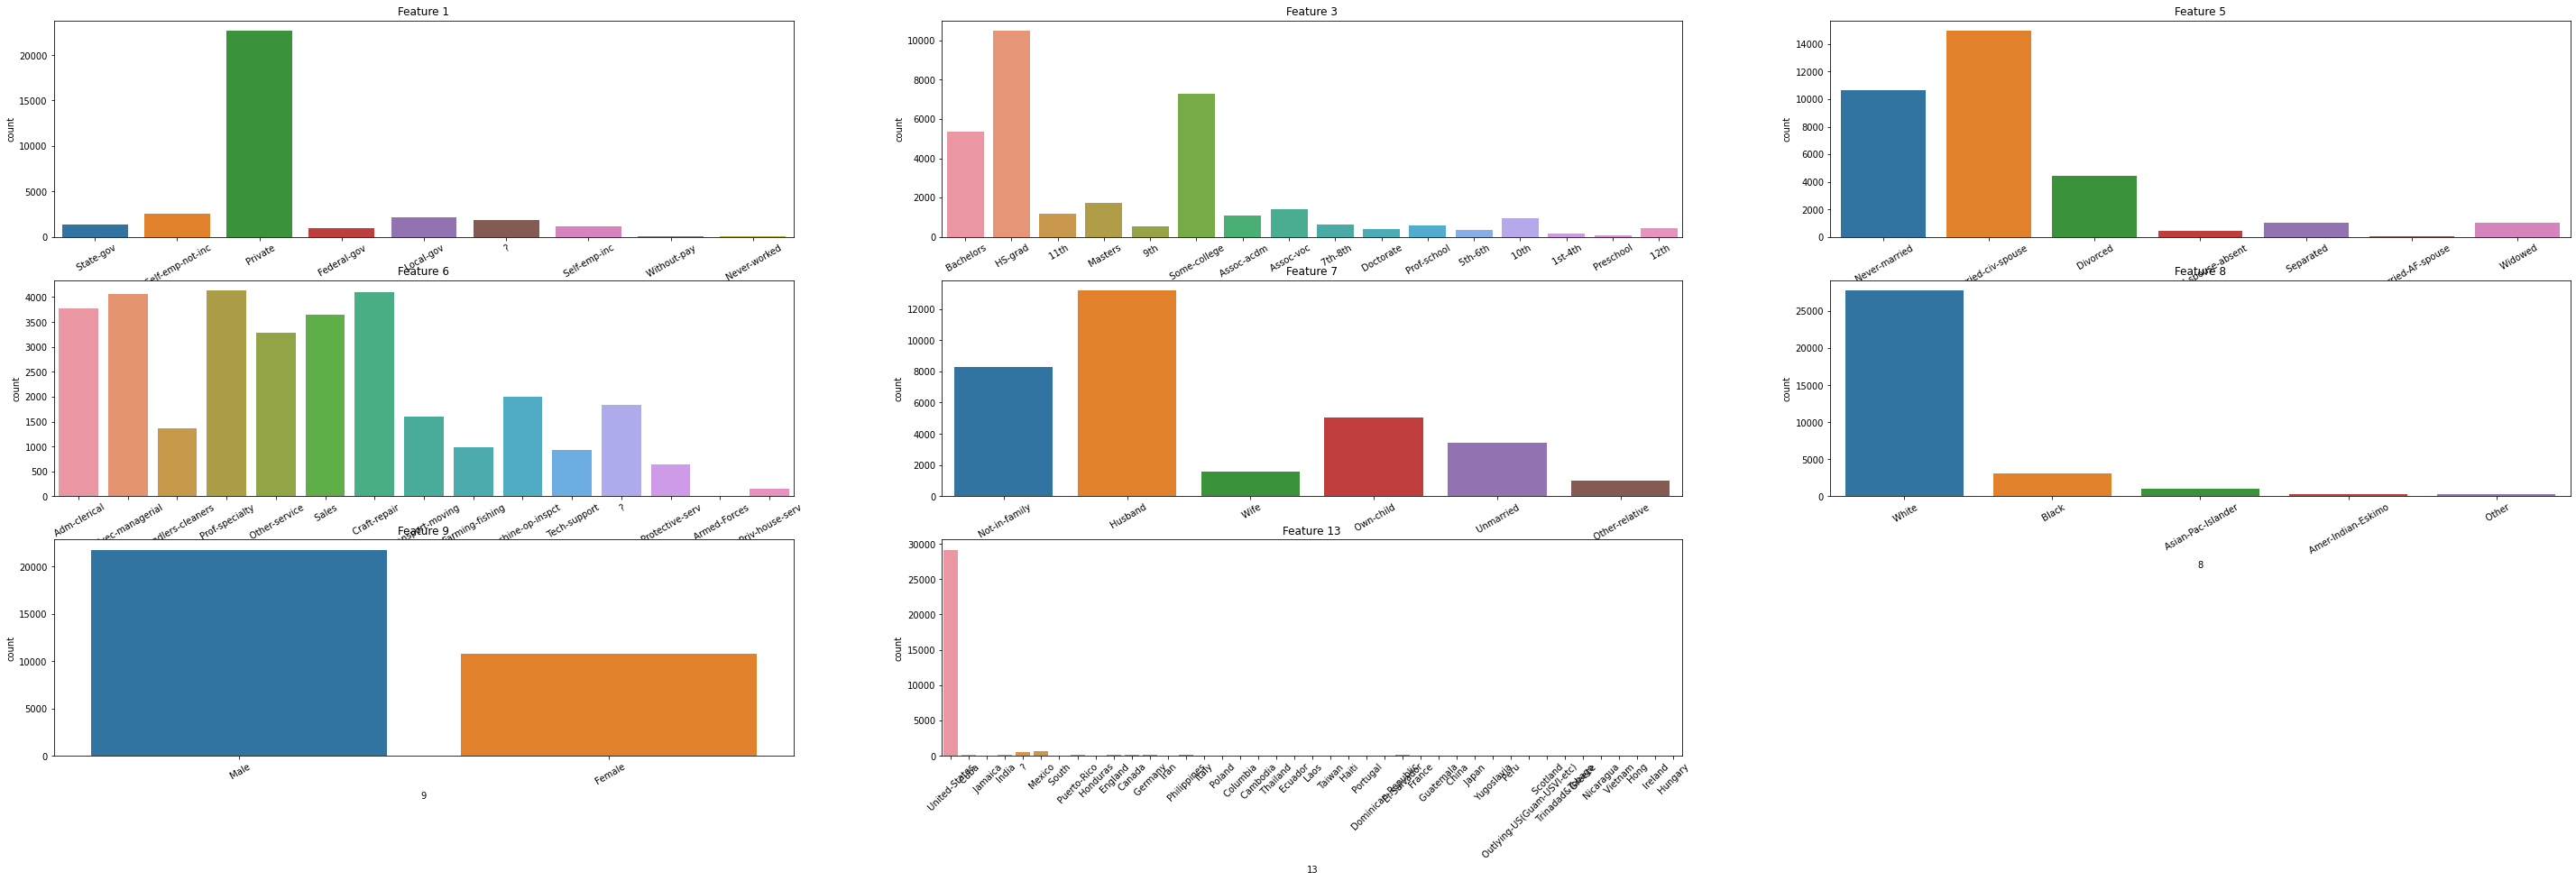

In [ ]:
plt.figure(figsize=(50, 15))  
plt.subplot(3,3,1)
plt.title('Feature 1')
sns.countplot(train[1]).set_xticklabels(rotation=30, labels=train[1].unique())

plt.subplot(3,3,2)
plt.title('Feature 3')
sns.countplot(train[3]).set_xticklabels(rotation=30, labels=train[3].unique())

plt.subplot(3,3,3)
plt.title('Feature 5')
sns.countplot(train[5]).set_xticklabels(rotation=30, labels=train[5].unique())

plt.subplot(3,3,4)
plt.title('Feature 6')
sns.countplot(train[6]).set_xticklabels(rotation=30, labels=train[6].unique())

plt.subplot(3,3,5)
plt.title('Feature 7')
sns.countplot(train[7]).set_xticklabels(rotation=30, labels=train[7].unique())

plt.subplot(3,3,6)
plt.title('Feature 8')
sns.countplot(train[8]).set_xticklabels(rotation=30, labels=train[8].unique())

plt.subplot(3,3,7)
plt.title('Feature 9')
sns.countplot(train[9]).set_xticklabels(rotation=30, labels=train[9].unique())

plt.subplot(3,3,8)
plt.title('Feature 13')
sns.countplot(train[13]).set_xticklabels(rotation=45, labels=train[13].unique())
plt.show()    

In [ ]:
num_feats

[2, 4, 10, 11, 12]

In [ ]:
#Plotting the number of unique values in numrice data because if variance is less than 3 we will convert it to catg.  
unique = []
for col in num_feats:
      unique.append(len(train[col].unique()))
      print(col, len(train[col].unique()))

2 21647
4 16
10 119
11 92
12 94


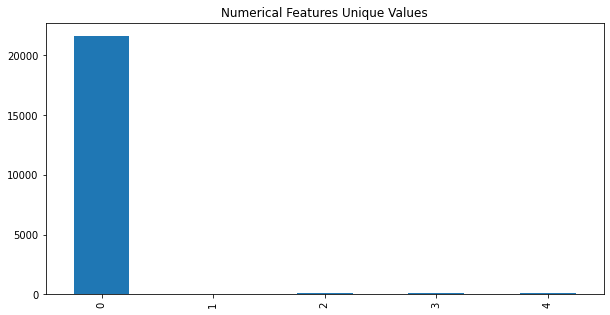

In [ ]:
#Plotting for variance in numeric features
unique = pd.DataFrame(unique, index=range(0,5), columns=['Numerical Features'])
plt.figure(figsize=(10, 5))
unique['Numerical Features'].plot.bar()
plt.title('Numerical Features Unique Values')
plt.show()

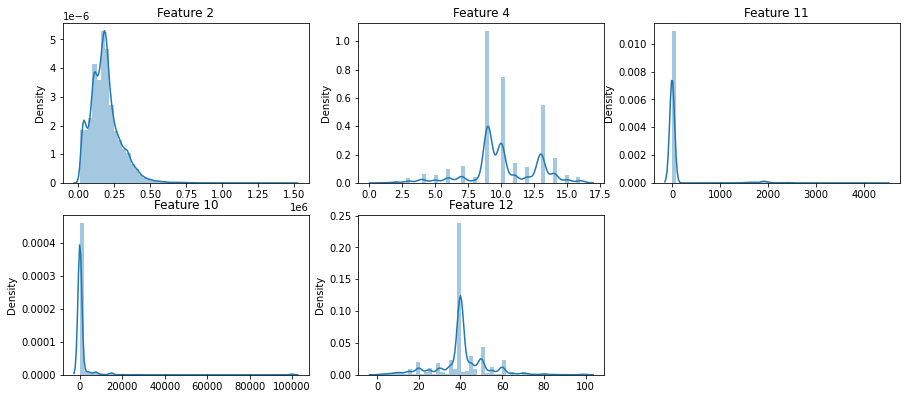

In [ ]:
#Closer lookk into density variance features #3,4,15,17,19,22,34,39
plt.figure(figsize=(15, 10))  
plt.subplot(3,3,1)
plt.title('Feature 2')
sns.distplot(x = train[2])
plt.subplot(3,3,2)
plt.title('Feature 4')
sns.distplot(x =train[4])
plt.subplot(3,3,3)
plt.title('Feature 11')
sns.distplot(x = train[11])
plt.subplot(3,3,4)
plt.title('Feature 10')
sns.distplot(x = train[10])
plt.subplot(3,3,5)
plt.title('Feature 12')
sns.distplot(x = train[12])
plt.show()

### Bivariate Analysis

Checking how single features are realted with target features

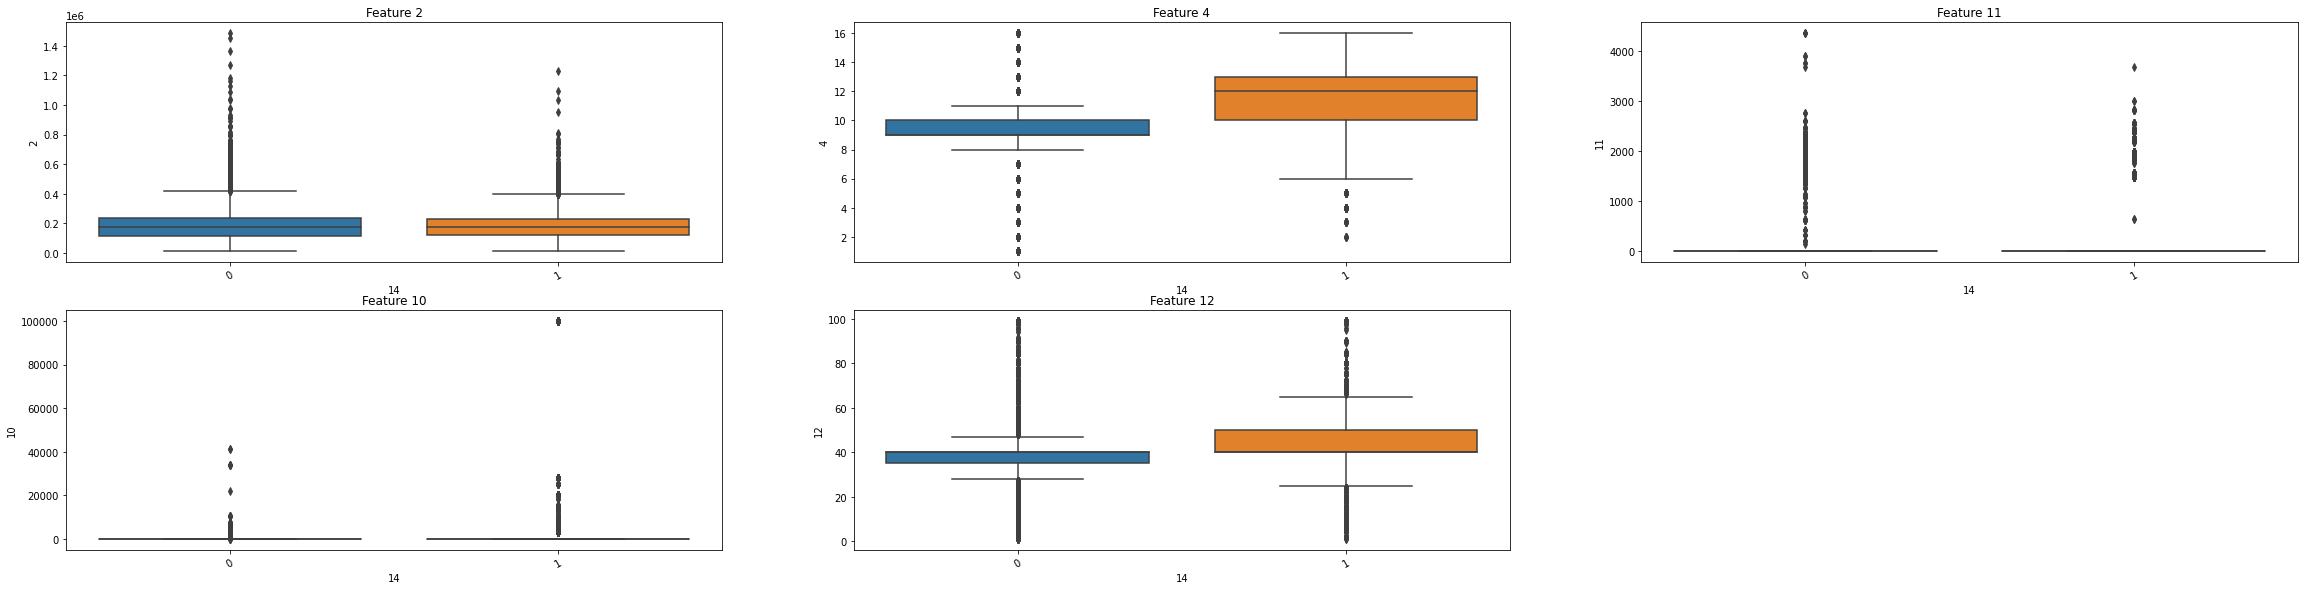

In [ ]:
plt.figure(figsize=(40, 15))  #3,4,15,17,19,22,34,39
plt.subplot(3,3,1)
plt.title('Feature 2')
sns.boxplot(y = 2, x = 14, data = train).set_xticklabels(rotation=30, labels=train[14].unique())
plt.subplot(3,3,2)
plt.title('Feature 4')
sns.boxplot(y =4 , x = 14, data = train).set_xticklabels(rotation=30, labels=train[14].unique())
plt.subplot(3,3,3)
plt.title('Feature 11')
sns.boxplot(y = 11, x = 14, data = train).set_xticklabels(rotation=30, labels=train[14].unique())
plt.subplot(3,3,4)
plt.title('Feature 10')
sns.boxplot(y = 10, x = 14, data = train).set_xticklabels(rotation=30, labels=train[14].unique())
plt.subplot(3,3,5)
plt.title('Feature 12')
sns.boxplot(y = 12, x = 14, data = train).set_xticklabels(rotation=30, labels=train[14].unique())
plt.show()


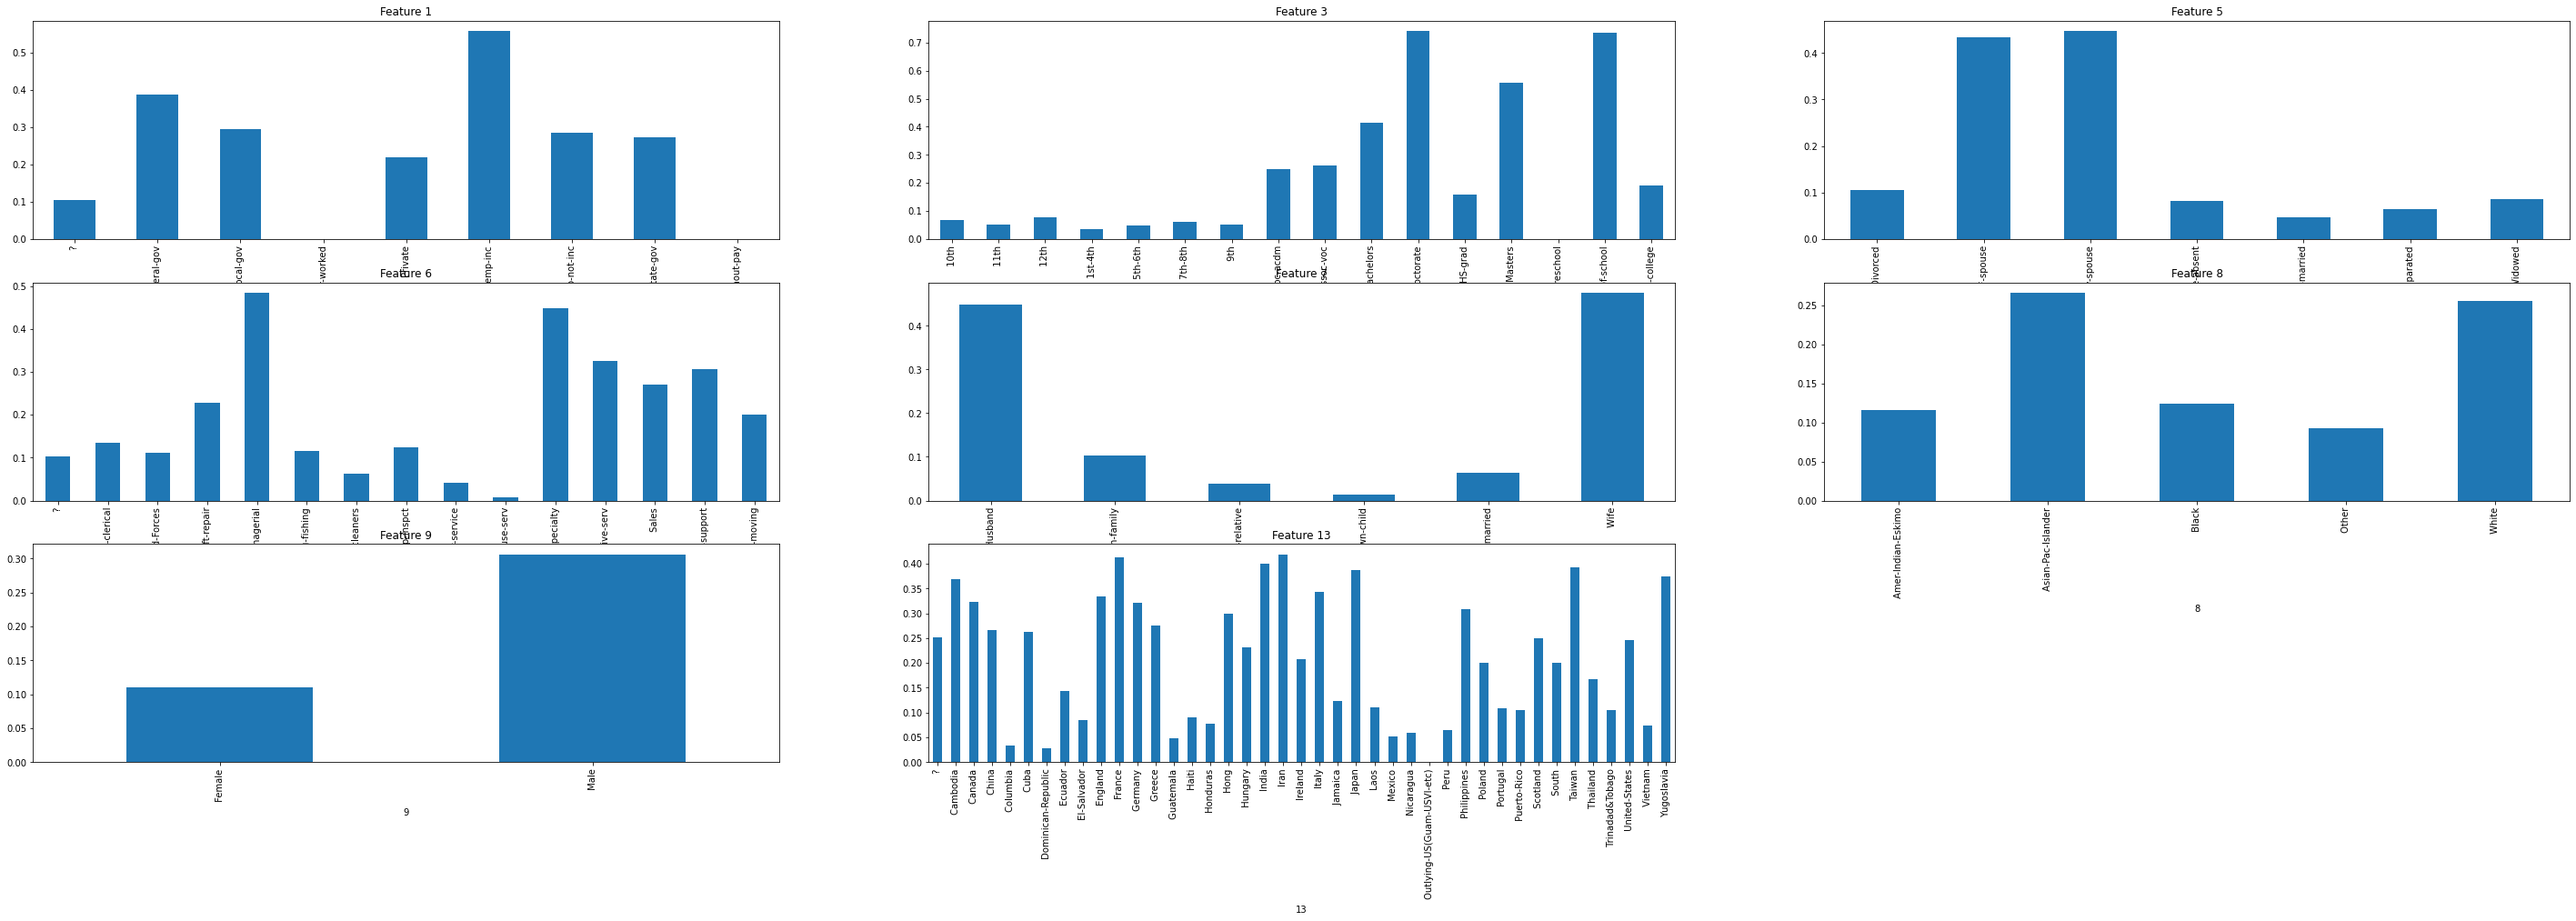

In [ ]:
plt.figure(figsize=(50, 15))  
plt.subplot(3,3,1)
plt.title('Feature 1')
train.groupby(1)[14].mean().plot(kind='bar')

plt.subplot(3,3,2)
plt.title('Feature 3')
train.groupby(3)[14].mean().plot(kind='bar')

plt.subplot(3,3,3)
plt.title('Feature 5')
train.groupby(5)[14].mean().plot(kind='bar')

plt.subplot(3,3,4)
plt.title('Feature 6')
train.groupby(6)[14].mean().plot(kind='bar')

plt.subplot(3,3,5)
plt.title('Feature 7')
train.groupby(7)[14].mean().plot(kind='bar')

plt.subplot(3,3,6)
plt.title('Feature 8')
train.groupby(8)[14].mean().plot(kind='bar')

plt.subplot(3,3,7)
plt.title('Feature 9')
train.groupby(9)[14].mean().plot(kind='bar')

plt.subplot(3,3,8)
plt.title('Feature 13')
train.groupby(13)[14].mean().plot(kind='bar')
plt.show()    

### Data PreProcessing

Preprocessing our features so that model will accept them while training. 

In [ ]:
cat_feats, num_feats

([1, 3, 5, 6, 7, 8, 9, 13], [2, 4, 10, 11, 12])

Dummy Feature:  A dummy variable is a binary variable that indicates 
whether a separate categorical variable takes on a specific value.

In [ ]:
#created dummy variables uusing pandas feature for train
for each in cat_feats:
    dummiesList = pd.get_dummies(train[each],drop_first=True)
    train = pd.concat([train, dummiesList], axis = 1)
    train= train.drop(columns=[each])
    print(each,train.shape)

1 (32536, 22)
3 (32536, 36)
5 (32536, 41)
6 (32536, 54)
7 (32536, 58)
8 (32536, 61)
9 (32536, 61)
13 (32536, 100)


In [ ]:
#created dummy variables uusing pandas feature for test
for each in cat_feats:
    dummiesList = pd.get_dummies(test[each],drop_first=True)
    test = pd.concat([test, dummiesList], axis = 1)
    test= test.drop(columns=[each])
    print(each,test.shape)

1 (16281, 22)
3 (16281, 36)
5 (16281, 41)
6 (16281, 54)
7 (16281, 58)
8 (16281, 61)
9 (16281, 61)
13 (16281, 100)


In [ ]:
# Labelling Catg features as Numeric labels so model can process them
#from sklearn.preprocessing import LabelEncoder

#for each in train[cat_feats].columns:
    #le = LabelEncoder()
    #train[each] = le.fit_transform(train[each])
    #test[each] = le.transform(test[each])

In [ ]:
train.head() #observing after creating dummy features for train and test datasets

,0,2,4,10,11,12,14,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,Other,White,Male,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,0,2,4,10,11,12,14,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,Other,White,Male,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
1,25,226802.0,7.0,0.0,0.0,40.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,89814.0,9.0,0.0,0.0,50.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,336951.0,12.0,0.0,0.0,40.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,44,160323.0,10.0,7688.0,0.0,40.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,18,103497.0,10.0,0.0,0.0,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


train test and validation splits

In [ ]:
#splitiing data for test and train for validation purpose
from sklearn.model_selection import train_test_split

# create x and y train
X = train.drop(columns=[14], axis=1)
y = train[[14]]

X_test = test.drop(columns=[14], axis=1)
y_test = test[[14]]

np.random.seed(0)# split data into train and test/validation sets

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify = y,random_state=41,)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, X_test.shape, y_test.shape

((22775, 99), (9761, 99), (22775, 1), (9761, 1), (16281, 99), (16281, 1))

Scalling numeric features using Standard Scaler

Standard Scaler : Standardize features by removing the mean and scaling to unit variance

Note: Scalling is not required for tree models but we have used KNN and LR, hence scalling it for all

In [ ]:
from sklearn.preprocessing import StandardScaler

qt = StandardScaler()

X_train[num_feats] = qt.fit_transform(X_train[num_feats])

X_valid[num_feats] = qt.transform(X_valid[num_feats])

X_test[num_feats] = qt.transform(X_test[num_feats])

In [ ]:
X_train.head()

,0,2,4,10,11,12,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,Other,White,Male,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
27337,31,0.361320,-0.030909,-0.146894,-0.216469,-0.447345,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
20211,40,-0.104248,-0.420047,-0.146894,-0.216469,-0.447345,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
20944,40,0.514592,-0.420047,-0.146894,-0.216469,-0.040322,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15493,67,-1.017181,-0.420047,-0.146894,-0.216469,-0.040322,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4251,43,0.508042,-0.420047,-0.146894,-0.216469,-0.040322,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_valid.head()

,0,2,4,10,11,12,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,Other,White,Male,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
31104,47,0.103309,-0.420047,0.525454,-0.216469,-0.040322,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10549,35,1.376715,-0.030909,-0.146894,-0.216469,-0.040322,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15517,49,-1.194744,1.136504,-0.146894,-0.216469,-0.040322,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
544,27,0.116494,-0.030909,-0.146894,-0.216469,0.773724,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2572,34,0.383531,-1.976598,-0.146894,-0.216469,-0.040322,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.head()

,0,2,4,10,11,12,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,Other,White,Male,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
1,25,0.351118,-1.198322,-0.146894,-0.216469,-0.040322,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,-0.938117,-0.420047,-0.146894,-0.216469,0.773724,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,1.387763,0.747367,-0.146894,-0.216469,-0.040322,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,44,-0.274536,-0.030909,0.851370,-0.216469,-0.040322,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,18,-0.809342,-0.030909,-0.146894,-0.216469,-0.854368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=  RandomForestClassifier(random_state=42, class_weight='balanced')

rfc.fit(X_train,y_train)

pred = rfc.predict(X_valid)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,pred)  #checking accuracy on validation datasets

0.8548304477000307

In [ ]:
pred_ = rfc.predict(X_test)
accuracy_score(y_test,pred_) #checking accuracy on test datasets

0.8552300227258768

it's almost same, hence no overfitting present

In [ ]:
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7409
           1       0.75      0.60      0.67      2352

    accuracy                           0.85      9761
   macro avg       0.81      0.77      0.79      9761
weighted avg       0.85      0.85      0.85      9761



Model has predicted class 0 better than class 1, this could be due to class imbqalnce we talked about earlier

Text(0.5, 1.0, 'Feature Importance with RFC')

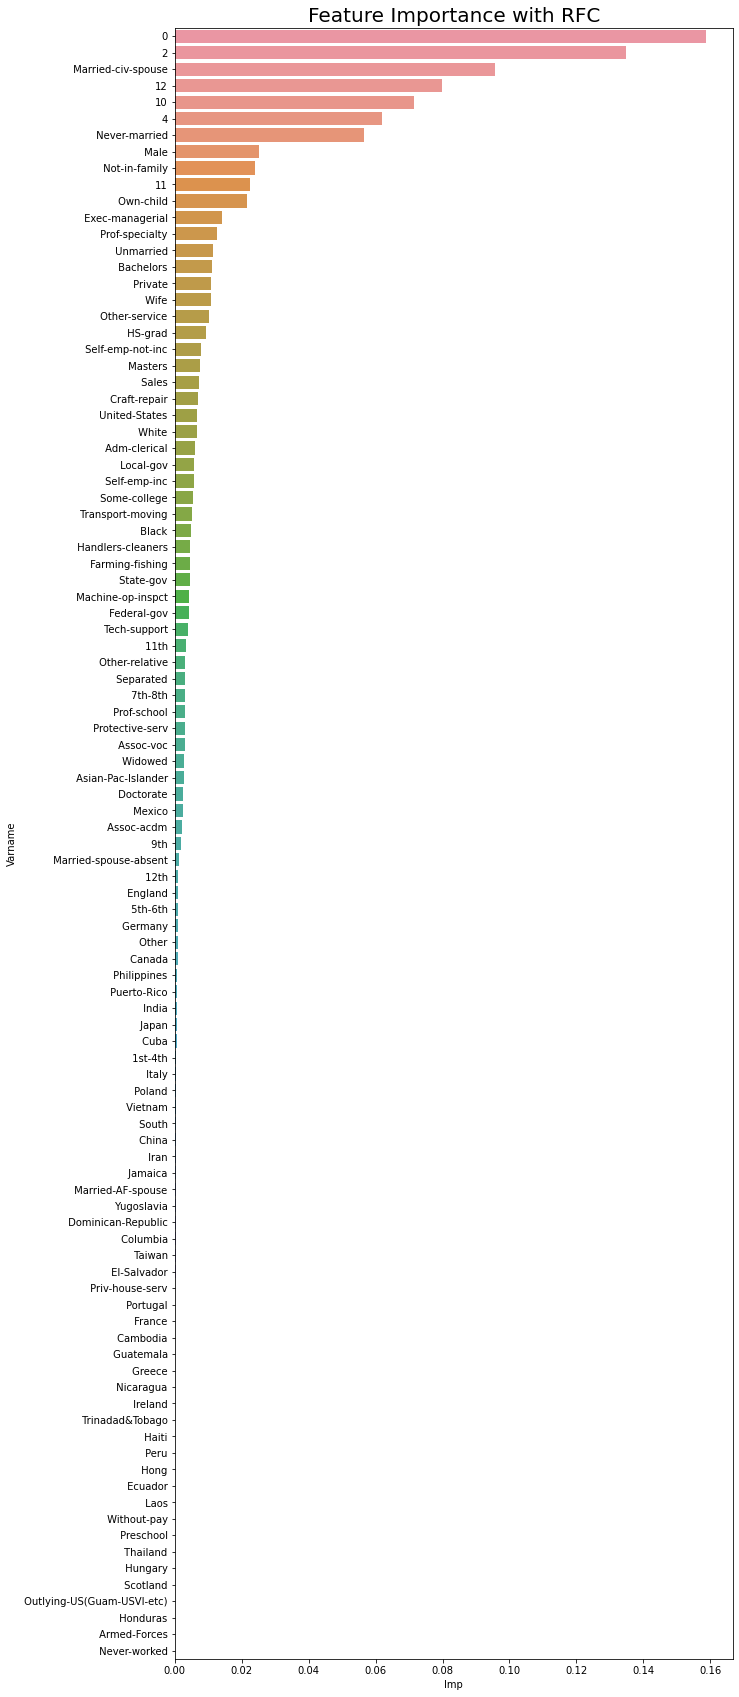

In [ ]:
#checking which features are important 
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rfc.feature_importances_}).sort_values(by="Imp", ascending=False)
    
from matplotlib import pyplot
a4_dims = (10, 30)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.barplot(x='Imp',y='Varname', data=imp_df,ax=ax)
plt.title('Feature Importance with RFC', fontsize=20)

In [ ]:
np.array(imp_df[:62]['Varname']) #taking first 60 important features and check if accuracy gets better

array([0, 2, ' Married-civ-spouse', 12, 10, 4, ' Never-married', ' Male',
       ' Not-in-family', 11, ' Own-child', ' Exec-managerial',
       ' Prof-specialty', ' Unmarried', ' Bachelors', ' Private', ' Wife',
       ' Other-service', ' HS-grad', ' Self-emp-not-inc', ' Masters',
       ' Sales', ' Craft-repair', ' United-States', ' White',
       ' Adm-clerical', ' Local-gov', ' Self-emp-inc', ' Some-college',
       ' Transport-moving', ' Black', ' Handlers-cleaners',
       ' Farming-fishing', ' State-gov', ' Machine-op-inspct',
       ' Federal-gov', ' Tech-support', ' 11th', ' Other-relative',
       ' Separated', ' 7th-8th', ' Prof-school', ' Protective-serv',
       ' Assoc-voc', ' Widowed', ' Asian-Pac-Islander', ' Doctorate',
       ' Mexico', ' Assoc-acdm', ' 9th', ' Married-spouse-absent',
       ' 12th', ' England', ' 5th-6th', ' Germany', ' Other', ' Canada',
       ' Philippines', ' Puerto-Rico', ' India', ' Japan', ' Cuba'],
      dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=  RandomForestClassifier(random_state=42, class_weight='balanced')

rfc.fit(X_train[imp_df[:62]['Varname']],y_train)

pred = rfc.predict(X_valid[imp_df[:62]['Varname']])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,pred)

0.855547587337363

In [ ]:
pred_ = rfc.predict(X_test[imp_df[:62]['Varname']])
accuracy_score(y_test,pred_)

0.8562741846323936

In [ ]:
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7409
           1       0.75      0.60      0.67      2352

    accuracy                           0.86      9761
   macro avg       0.82      0.77      0.79      9761
weighted avg       0.85      0.86      0.85      9761



slight improvment in accuracy

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#Initialize the linear regression model
reg = LogisticRegression()
#Train our model with the training data
reg.fit(X_train, y_train)
#print our price predictions on our test data
y_pred = reg.predict(X_valid)

In [ ]:
#printing the accuracy values 
print("Accuracy:",accuracy_score(y_valid, y_pred))

Accuracy: 0.8511423009937507


In [ ]:
#print our price predictions on our test data
y_pred = reg.predict(X_test)
#printing the accuracy values 
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8524660647380382


it's almost same, hence no overfitting present

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.59      0.65      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281



Model has predicted class 0 better than class 1, this could be due to class imbqalnce we talked about earlier. Results are almost same as RFC

### KNN 

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=21)
#Train our model with the training data
neigh.fit(X_train, y_train)
#print our price predictions on our test data
y_pred = neigh.predict(X_valid)
#printing the accuracy values 
print("Accuracy:",accuracy_score(y_valid, y_pred))

Accuracy: 0.8315746337465424
CPU times: user 14 s, sys: 37.1 ms, total: 14 s
Wall time: 13.9 s


In [ ]:
#print our price predictions on our test data
y_pred = neigh.predict(X_test)
#printing the accuracy values 
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8326884098028376


it's almost same, hence no overfitting present

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     12435
           1       0.67      0.56      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.74      0.75     16281
weighted avg       0.83      0.83      0.83     16281



Model has predicted class 0 better than class 1, this could be due to class imbqalnce we talked about earlier but KNN has given us lowest accuracy on this dataset

### XGB

In [ ]:
%%time
from xgboost import XGBClassifier

model = XGBClassifier(num_class=2,objective='multi:softmax',learning_rate=0.3,max_depth=3,random_state=0,n_jobs=-1,n_estimators=200)
                      
model.fit(X_train, y_train)

CPU times: user 30.4 s, sys: 38.7 ms, total: 30.4 s
Wall time: 15.5 s


In [ ]:
y_pred = model.predict(X_valid)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
print("Accuracy:",accuracy_score(y_valid, y_pred))

Accuracy: 0.8738858723491446


In [ ]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, num_class=2, objective='multi:softmax',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7409
           1       0.79      0.64      0.71      2352

    accuracy                           0.87      9761
   macro avg       0.84      0.80      0.82      9761
weighted avg       0.87      0.87      0.87      9761



Text(0.5, 1.0, 'Feature Importance with XGB')

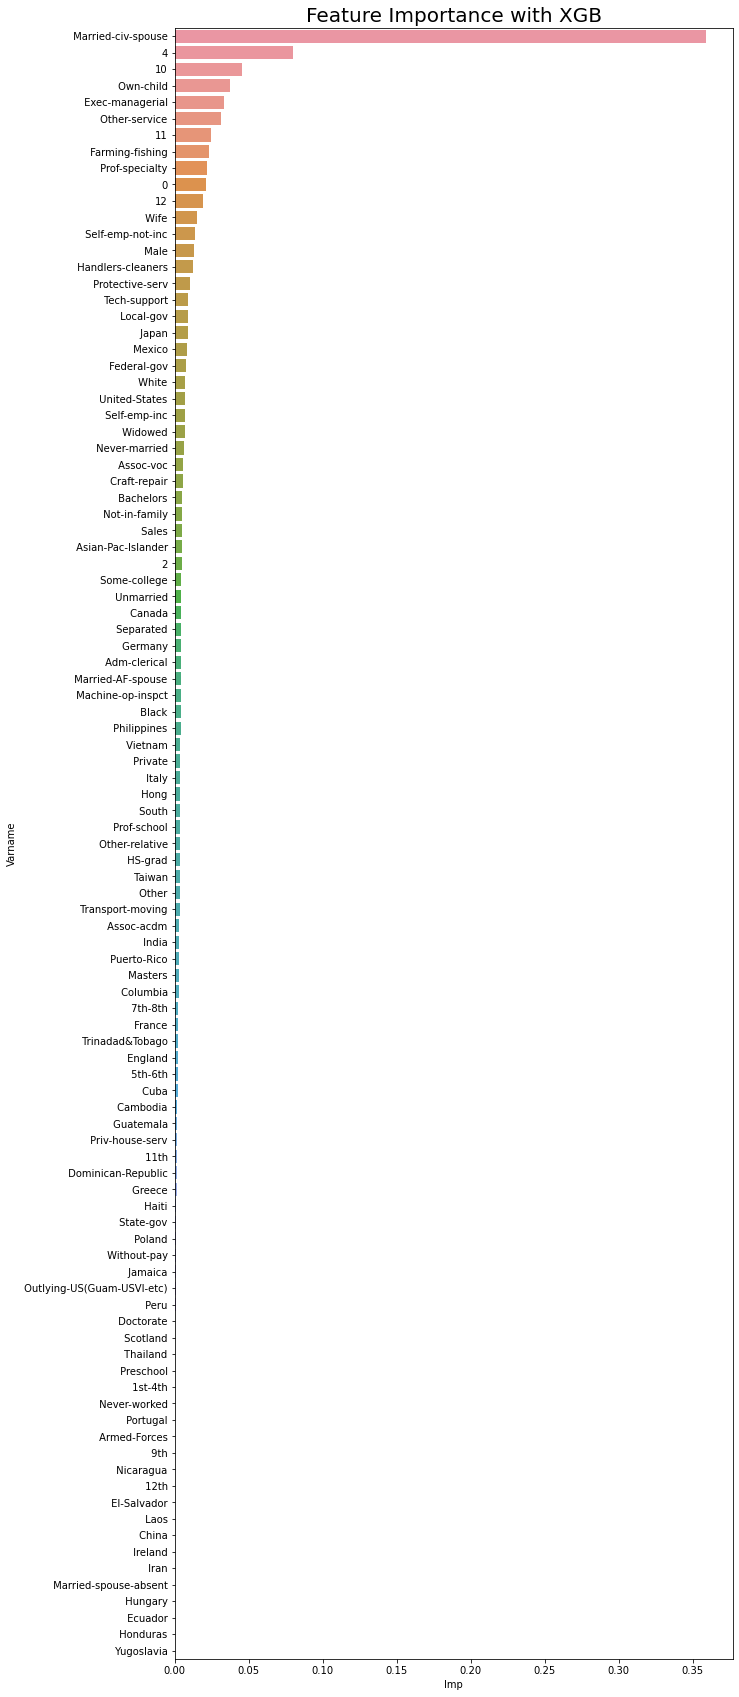

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": model.feature_importances_}).sort_values(by="Imp", ascending=False)
    
from matplotlib import pyplot
a4_dims = (10, 30)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.barplot(x='Imp',y='Varname', data=imp_df,ax=ax)
plt.title('Feature Importance with XGB', fontsize=20)

Model has predicted class 0 better than class 1, this could be due to class imbqalnce we talked about earlier but XGB has given us bettr accuracy on this dataset for both the classes if compared with earlier models

xgb has given has best performnce among all models, with some parameter tunning better results can be achieved. 

### SMOTE

SMOTE will try to balance our dataset for the both the classes so that we can have better accuracy for class 1 as well. 

SMOTE: This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [ ]:
print(y_train[14].value_counts()) #checking current class counts

0    17288
1     5487
Name: 14, dtype: int64


In [ ]:
%%time
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

#summarize distribution
print(pd.DataFrame(y_train_smote)[0].value_counts())

1    17288
0    17288
Name: 0, dtype: int64
CPU times: user 1.53 s, sys: 16.7 ms, total: 1.54 s
Wall time: 1.56 s


### RF with SMOTE

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=  RandomForestClassifier(random_state=42)

rfc.fit(X_train_smote, y_train_smote)

pred = rfc.predict(X_valid)
accuracy_score(y_valid,pred)

0.8483761909640406

In [ ]:
pred = rfc.predict(X_test)
accuracy_score(y_test,pred)

0.8455254591241325

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     12435
           1       0.68      0.65      0.67      3846

    accuracy                           0.85     16281
   macro avg       0.79      0.78      0.78     16281
weighted avg       0.84      0.85      0.84     16281



RFC is not giving us any better results for class even after using SMOTE. 

### LR with SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
#Initialize the linear regression model
reg = LogisticRegression()
#Train our model with the training data
reg.fit(X_train_smote, y_train_smote)
#print our price predictions on our test data
y_pred = reg.predict(X_valid)

#printing the accuracy values 
print("Accuracy:",accuracy_score(y_valid, y_pred))

Accuracy: 0.8096506505480996


In [ ]:
#print our price predictions on our test data
y_pred = reg.predict(X_test)
#printing the accuracy values 
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8095325839936122


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87     12435
           1       0.57      0.84      0.67      3846

    accuracy                           0.81     16281
   macro avg       0.75      0.82      0.77     16281
weighted avg       0.85      0.81      0.82     16281



Neither KNN, assuming other model will also not give us better results. But this is not the end, we can look into other data augmentaton methods to balance our data to see if that works

### Observations and Final Outcomes


---


*   This is a binary classfication probelm and XGB looks like the best model in terms of accuracy and lowest error on the given datasets

*   SMOTE hasn't proced any better results for thsi particular dataset but other option can also be tried out if time allows

*   Most Important Features are by RFC Model
 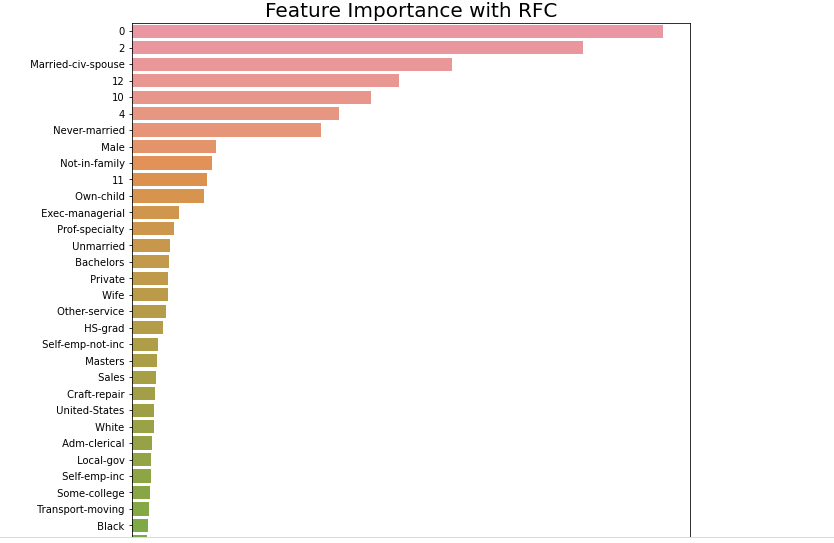

*   Most Important Features by XGB
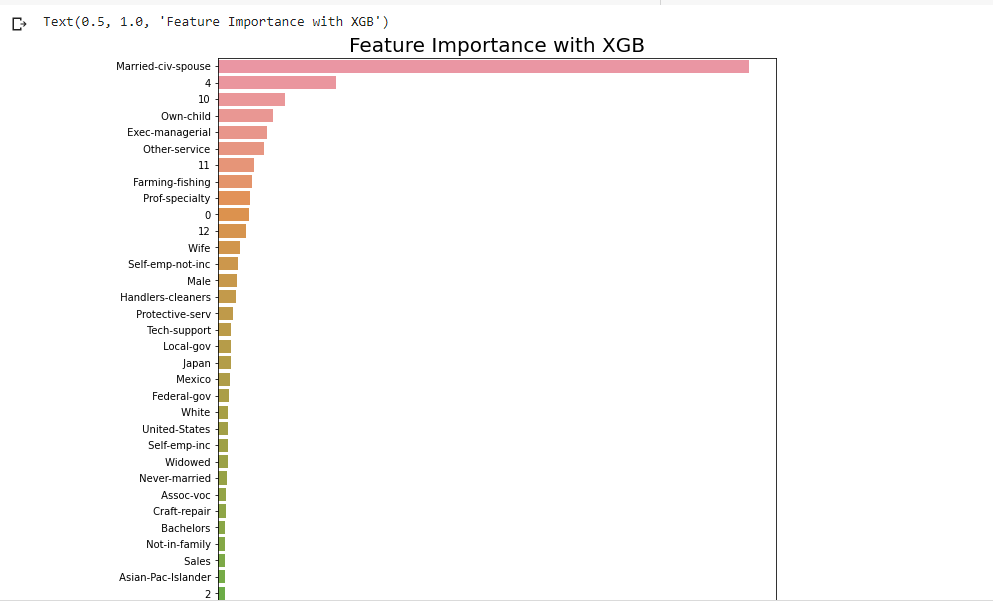





### What Could be done better?




-  Using Data Dictionary given on web url, column names can be adjusted so business can understand them easily
-  Data Augmentaion methods can be tried out
-  Hyperparameter tunning for models
-  Ensmeble of models to avoid further overfitting as tree models do Overfit sometimes





